<a href="https://colab.research.google.com/github/atoothman/DATA-70500/blob/main/DATA_70500_Toothman_NonCommunicable_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.0/417.0 kB 6.9 MB/s eta 0:00:00


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import polars as po
import pyreadr

In [11]:
# Upload file to colab
from google.colab import files
uploaded = files.upload()

Saving NonCommunicable Disease.csv to NonCommunicable Disease (2).csv


In [13]:
# Load CSV into dataframe
ncd = pd.read_csv('NonCommunicable Disease (1).csv')

In [14]:
ncd.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),102,United States of America,1,Male,22,All ages,294,All causes,1,Number,2000,4.522572e+07,4.985095e+07,4.117955e+07
1,2,DALYs (Disability-Adjusted Life Years),102,United States of America,2,Female,22,All ages,294,All causes,1,Number,2000,4.425854e+07,5.024614e+07,3.897605e+07
2,2,DALYs (Disability-Adjusted Life Years),102,United States of America,3,Both,22,All ages,294,All causes,1,Number,2000,8.948427e+07,1.001548e+08,8.020517e+07
3,2,DALYs (Disability-Adjusted Life Years),102,United States of America,1,Male,22,All ages,410,Neoplasms,1,Number,2000,7.415339e+06,7.595257e+06,7.161253e+06
4,2,DALYs (Disability-Adjusted Life Years),102,United States of America,2,Female,22,All ages,410,Neoplasms,1,Number,2000,6.796334e+06,7.022050e+06,6.415272e+06


In [15]:
# Check for missing values
ncd.isnull().sum()

,0
measure_id,0
measure_name,0
location_id,0
location_name,0
sex_id,0
sex_name,0
age_id,0
age_name,0
cause_id,0
cause_name,0


In [16]:
ncd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     924 non-null    int64  
 1   measure_name   924 non-null    object 
 2   location_id    924 non-null    int64  
 3   location_name  924 non-null    object 
 4   sex_id         924 non-null    int64  
 5   sex_name       924 non-null    object 
 6   age_id         924 non-null    int64  
 7   age_name       924 non-null    object 
 8   cause_id       924 non-null    int64  
 9   cause_name     924 non-null    object 
 10  metric_id      924 non-null    int64  
 11  metric_name    924 non-null    object 
 12  year           924 non-null    int64  
 13  val            924 non-null    float64
 14  upper          924 non-null    float64
 15  lower          924 non-null    float64
dtypes: float64(3), int64(7), object(6)
memory usage: 115.6+ KB


In [17]:
# Summary Stats
ncd.describe()

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,924.0,924.0,924.000000,924.0,924.000000,924.0,924.000000,9.240000e+02,9.240000e+02,9.240000e+02
mean,2.0,102.0,2.000000,22.0,590.928571,1.0,2010.500000,1.284610e+07,1.472280e+07,1.122413e+07
std,0.0,0.0,0.816939,0.0,186.200783,0.0,6.347725,2.208879e+07,2.479815e+07,1.975581e+07
min,2.0,102.0,1.000000,22.0,294.000000,1.0,2000.000000,7.787626e+05,9.657743e+05,5.366671e+05
25%,2.0,102.0,1.000000,22.0,491.000000,1.0,2005.000000,2.346981e+06,2.909622e+06,1.920044e+06
50%,2.0,102.0,2.000000,22.0,550.000000,1.0,2010.500000,4.290479e+06,5.403273e+06,3.320573e+06
75%,2.0,102.0,3.000000,22.0,653.000000,1.0,2016.000000,8.061417e+06,9.726365e+06,7.221533e+06
max,2.0,102.0,3.000000,22.0,974.000000,1.0,2021.000000,1.266681e+08,1.414649e+08,1.137835e+08


In [39]:
# Filter gender (sex_name) to both to include both name and female over time
filtered_ncd_both = ncd.loc[ncd['sex_name'] == 'Both']

In [45]:
# Drop rows where cause_name is "All Causes" or "Non-Communicable Diseases" because of redundancy in dataset
filtered_ncd_both = filtered_ncd_both[~filtered_ncd_both['cause_name'].isin(['All causes', 'Non-communicable diseases'])]

In [46]:
# Sum of NCD for both genders over time
ncd_cause_data_both = filtered_ncd_both.groupby('cause_name')['val'].sum().sort_values(ascending=False)
print(ncd_cause_data_both)

cause_name
Cardiovascular diseases            3.629808e+08
Neoplasms                          3.304610e+08
Musculoskeletal disorders          2.250651e+08
Mental disorders                   1.733344e+08
Neurological disorders             1.399219e+08
Diabetes and kidney diseases       1.289633e+08
Chronic respiratory diseases       1.222998e+08
Substance use disorders            1.037587e+08
Other non-communicable diseases    9.851608e+07
Digestive diseases                 7.581626e+07
Sense organ diseases               5.724706e+07
Skin and subcutaneous diseases     4.385885e+07
Name: val, dtype: float64


<ipython-input-47-ed85c06a1515>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ncd_cause_data_both.index, y=ncd_cause_data_both.values, palette="Blues_d")


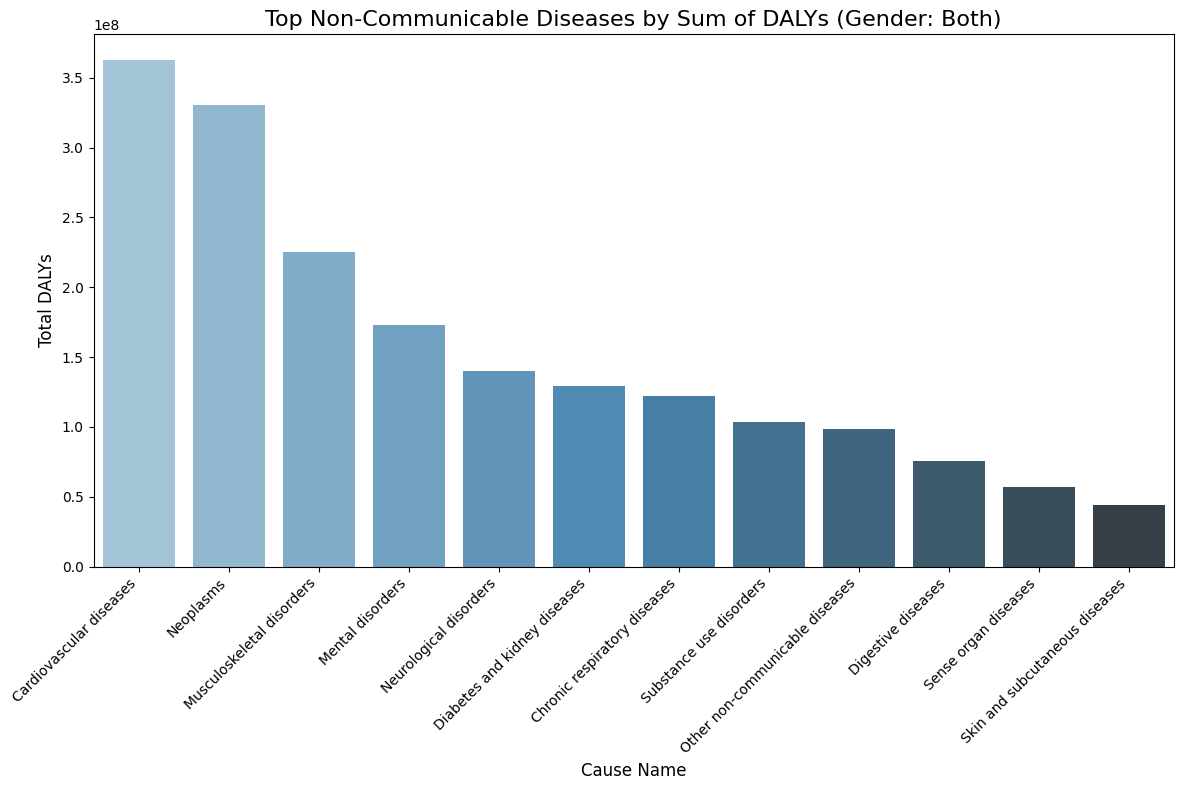

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar plot of the top NCD causes
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x=ncd_cause_data_both.index, y=ncd_cause_data_both.values, palette="Blues_d")

# Add titles and labels
plt.title('Top Non-Communicable Diseases by Sum of DALYs (Gender: Both)', fontsize=16)
plt.xlabel('Cause Name', fontsize=12)
plt.ylabel('Total DALYs', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()